# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [3]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path,decimal=',')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [7]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  decimal values       <br>
2-  null values          <br>
3-  casting Objects to numric values    <br>

In [8]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**Second issue**

In [9]:
df_copy['Climate'] = df_copy['Climate'].fillna(df_copy['Climate'].median())
df_copy['Service'] = df_copy['Service'].fillna(df_copy['Service'].mean())
df_copy['Industry'] = df_copy['Industry'].fillna(df_copy['Industry'].mean())
df_copy['Agriculture'] = df_copy['Agriculture'].fillna(df_copy['Agriculture'].mean())
df_copy["Literacy (%)"] = df_copy["Literacy (%)"].fillna(df_copy["Literacy (%)"].median())
df_copy.drop(columns=['Country', 'Region'],inplace=True)
df_copy=df_copy.dropna()

In [10]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          218 non-null    int64  
 1   Area (sq. mi.)                      218 non-null    int64  
 2   Pop. Density (per sq. mi.)          218 non-null    float64
 3   Coastline (coast/area ratio)        218 non-null    float64
 4   Net migration                       218 non-null    float64
 5   Infant mortality (per 1000 births)  218 non-null    float64
 6   GDP ($ per capita)                  218 non-null    float64
 7   Literacy (%)                        218 non-null    float64
 8   Phones (per 1000)                   218 non-null    float64
 9   Arable (%)                          218 non-null    float64
 10  Crops (%)                           218 non-null    float64
 11  Other (%)                           218 non-n

**Second issue**

In [11]:
#solution 
df_copy = df_copy.astype({'Climate':'int'})

In [12]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          218 non-null    int64  
 1   Area (sq. mi.)                      218 non-null    int64  
 2   Pop. Density (per sq. mi.)          218 non-null    float64
 3   Coastline (coast/area ratio)        218 non-null    float64
 4   Net migration                       218 non-null    float64
 5   Infant mortality (per 1000 births)  218 non-null    float64
 6   GDP ($ per capita)                  218 non-null    float64
 7   Literacy (%)                        218 non-null    float64
 8   Phones (per 1000)                   218 non-null    float64
 9   Arable (%)                          218 non-null    float64
 10  Crops (%)                           218 non-null    float64
 11  Other (%)                           218 non-n

In [13]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

Population                            0.0
Area (sq. mi.)                        0.0
Pop. Density (per sq. mi.)            0.0
Coastline (coast/area ratio)          0.0
Net migration                         0.0
Infant mortality (per 1000 births)    0.0
GDP ($ per capita)                    0.0
Literacy (%)                          0.0
Phones (per 1000)                     0.0
Arable (%)                            0.0
Crops (%)                             0.0
Other (%)                             0.0
Climate                               0.0
Birthrate                             0.0
Deathrate                             0.0
Agriculture                           0.0
Industry                              0.0
Service                               0.0
dtype: float64

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
transformer = RobustScaler()
fitted=transformer.fit_transform(df_copy)
fitted

array([[ 1.40306358,  1.25507429, -0.18083961, ...,  1.5106082 ,
        -0.30308014, -0.80470367],
       [-0.095664  , -0.14377905,  0.29032754, ...,  0.67326733,
        -0.67517317,  0.05957429],
       [ 1.50523729,  5.17578471, -0.39120406, ..., -0.0678925 ,
         2.27294848, -1.1608383 ],
       ...,
       [ 0.87935774,  0.98484496, -0.22635707, ...,  0.12446959,
         1.35702719, -0.7482433 ],
       [ 0.33637629,  1.49271242, -0.38197755, ...,  0.60537482,
         0.05470161, -0.33130519],
       [ 0.37645795,  0.67423835, -0.28356143, ...,  0.37340877,
        -0.28161324,  0.05957429]])

In [20]:
df=pd.DataFrame(fitted)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.403064,1.255074,-0.180840,-0.077879,11.840822,2.971028,-0.369565,-2.615741,-0.477255,0.098103,-0.188791,0.077032,-1.0,1.622284,2.407298,1.510608,-0.303080,-0.804704
1,-0.095664,-0.143779,0.290328,0.061309,-2.531451,0.010041,-0.094203,-0.277778,-0.286016,0.629223,0.802360,-0.497327,1.0,-0.214671,-0.574951,0.673267,-0.675173,0.059574
2,1.505237,5.175785,-0.391204,-0.073460,-0.200257,0.208346,0.014493,-1.041667,-0.266610,-0.430053,-0.181711,0.464594,-1.0,-0.096252,-0.695266,-0.067893,2.272948,-1.160838
3,-0.287884,-0.208322,1.310165,6.361226,-10.634146,-0.246209,0.159420,0.208333,0.243549,-0.028156,3.299115,-0.475068,0.0,0.214088,-0.959566,0.214112,0.002543,0.000000
4,-0.287153,-0.207714,0.459480,-0.077879,3.388960,-0.355402,0.956522,0.347222,0.912044,-0.489330,-0.240708,0.519149,1.0,-0.588012,-0.371795,0.214112,0.002543,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,-0.285112,-0.204453,-0.126096,1.009114,-4.590501,-0.272147,0.826087,0.000000,1.349645,0.076171,0.453097,-0.025532,0.0,-0.281756,-0.336292,-0.582744,-0.660862,1.019401
214,-0.156821,-0.195523,2.106720,-0.077879,1.530167,-0.029704,-0.362319,0.000000,-0.077902,0.380854,4.235988,-0.949482,1.0,0.751349,-0.831361,-0.130127,-0.016855,0.281073
215,0.879358,0.984845,-0.226357,-0.038111,0.000000,0.846355,-0.362319,-1.958333,-0.381635,-0.456135,-0.184071,0.484233,-1.0,1.405863,0.032544,0.124470,1.357027,-0.748243
216,0.336376,1.492712,-0.381978,-0.077879,0.000000,1.406757,-0.362319,-0.550926,-0.463193,-0.201245,-0.233628,0.306165,0.0,1.295610,2.326430,0.605375,0.054702,-0.331305


In [21]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,0.468469,-0.029208,-0.067216,0.002303,0.021134,-0.041881,-0.052543,-0.029443,0.189264,-0.059846,-0.122007,-0.091283,-0.046170,-0.030099,-0.001882,0.095801,-0.077675
1,0.468469,1.000000,-0.068327,-0.094269,0.050903,-0.010212,0.070050,0.026632,0.057243,-0.081296,-0.143605,0.139455,-0.112804,-0.068008,0.037901,-0.053756,0.116239,-0.048143
2,-0.029208,-0.068327,1.000000,0.241553,0.177496,-0.146063,0.195093,0.102276,0.282497,-0.082881,-0.030792,0.082734,0.001968,-0.161176,-0.071362,-0.106309,-0.107123,0.190707
3,-0.067216,-0.094269,0.241553,1.000000,-0.140001,-0.137064,0.049730,0.129588,0.150222,-0.122696,0.341798,-0.076633,-0.026212,-0.076285,-0.162633,-0.027396,-0.182458,0.179151
4,0.002303,0.050903,0.177496,-0.140001,1.000000,-0.027485,0.387941,-0.010087,0.241242,-0.056569,-0.348629,0.224854,-0.018002,-0.073786,0.035387,-0.103212,-0.019121,0.109274
5,0.021134,-0.010212,-0.146063,-0.137064,-0.027485,1.000000,-0.604044,-0.766953,-0.672928,-0.109696,-0.064438,0.121689,-0.343328,0.845519,0.661409,0.699498,-0.004318,-0.623308
6,-0.041881,0.070050,0.195093,0.049730,0.387941,-0.604044,1.000000,0.501336,0.840082,0.024328,-0.219772,0.093306,0.299670,-0.648752,-0.207830,-0.573311,-0.024875,0.537575
7,-0.052543,0.026632,0.102276,0.129588,-0.010087,-0.766953,0.501336,1.000000,0.577047,0.077661,0.065608,-0.096397,0.359938,-0.771875,-0.402556,-0.597972,0.051180,0.492227
8,-0.029443,0.057243,0.282497,0.150222,0.241242,-0.672928,0.840082,0.577047,1.000000,0.057999,-0.150230,0.030418,0.355134,-0.723732,-0.268045,-0.574244,-0.125982,0.624536
9,0.189264,-0.081296,-0.082881,-0.122696,-0.056569,-0.109696,0.024328,0.077661,0.057999,1.000000,0.101570,-0.859388,0.338359,-0.187132,0.052013,-0.038452,-0.062677,0.089292


In [52]:
def get_redundant_df(df):
    df_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            df_to_drop.add((cols[i], cols[j]))
    return df_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_df(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Top Absolute Correlations
9   11    0.859388
5   13    0.845519
6   8     0.840082
7   13    0.771875
5   7     0.766953
8   13    0.723732
5   15    0.699498
    8     0.672928
13  15    0.668653
5   14    0.661409
dtype: float64


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4
0,-2.590011,-2.430343,-0.704765,1.207583,10.610711
1,-2.230219,-0.562249,-2.214640,-1.167556,-2.323107
2,-3.227095,-1.770750,1.063605,3.617480,-0.492787
3,0.911871,5.583553,-0.598156,-1.921471,-9.872315
4,-1.902817,-1.321883,-2.591596,-0.160853,3.660446
...,...,...,...,...,...
213,-2.234330,0.615708,-2.106381,-1.100088,-3.548525
214,-0.440245,-1.348777,-2.435512,-1.098638,-0.152048
215,-2.864280,-1.194942,-1.004413,-0.015376,0.178217
216,-3.016644,-1.103383,-1.358314,0.644807,0.112969


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

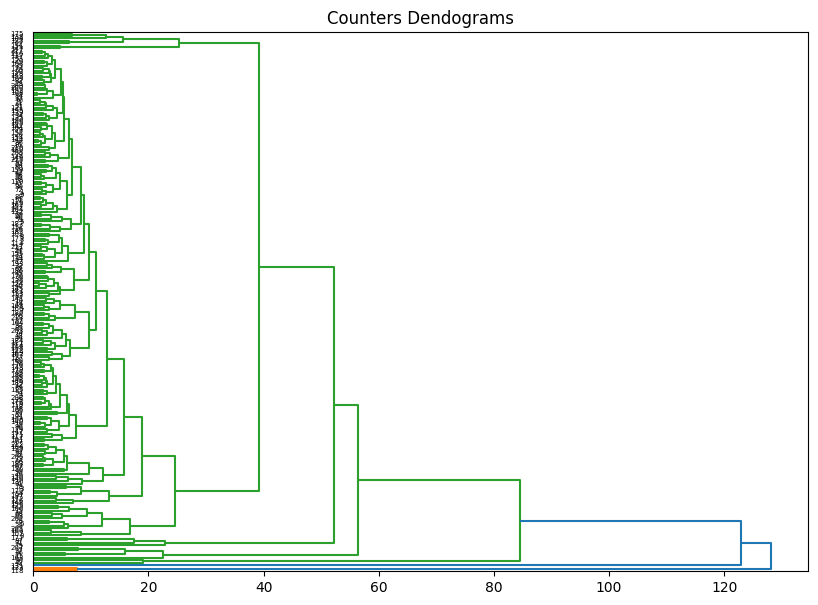

In [66]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=fitted , method="complete",metric="euclidean"),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [67]:
#training
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(affinity='euclidean',linkage='complete',n_clusters=3).fit(fitted)
clustering.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [68]:
from sklearn.metrics import silhouette_score
silhouette_score(principalDf, clustering.labels_,metric='euclidean')

0.8985906119920435

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

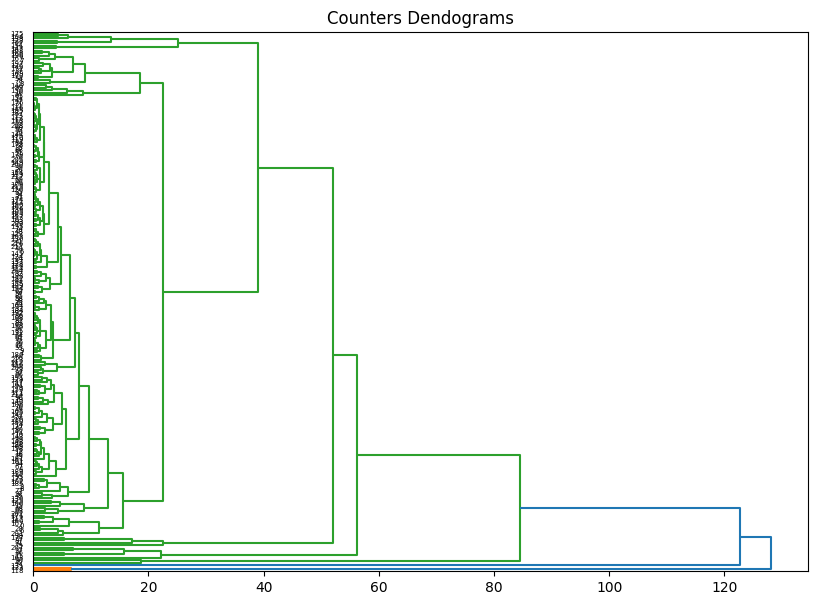

In [69]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=principalDf , method="complete",metric="euclidean"),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [70]:
from sklearn.cluster import AgglomerativeClustering

clustering2 = AgglomerativeClustering(affinity='euclidean',linkage='complete',n_clusters=3).fit(principalDf)
clustering2.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [71]:
from sklearn.metrics import silhouette_score
silhouette_score(principalDf, clustering2.labels_,metric='euclidean')

0.8985906119920435